# Bitcoin Correlation Analysis

##### Introduction:

Bitcoin (BTC) is often compared to various financial indicators such as Gold, S&P 500 Index, US Dollar Index, and the 5-Year and 10-Year US Treasury Yield. These comparisons typically highlight the correlation or inverse correlation between BTC and these metrics, often supported by price movement charts. However, the underlying mathematical explanation for these correlations is often left unexplored. To delve deeper into this topic, we have undertaken a comprehensive analysis to examine the correlation between Bitcoin and these financial metrics.

##### Notebook Overview:

In this notebook, we will conduct a correlation analysis between Bitcoin (BTC) and the following financial metrics:

* XAU - Gold
* SPX - S&P 500 Index
* DXY - US Dollar Index
* FVX - US 5-Year Treasury Yield
* TNX - US 10-Year Treasury Yield

The analysis will be divided into the following sections:

* Data Collection
* Data Preparation
* Data Exploration
* Correlation Analysis
* Data Visualization
* Interpretation and Conclusion

# Data Collection

The data used in this analysis are collected from Yahoo Finance for Bitcoin, Treasury Yields and S&P 500; and from Investing.com for US Dollar Index, and Gold. The data are stored in a CSV file named "data.csv" with the following columns:

* Date
* BTC - Bitcoin data
* XAU - Gold data
* SPX - S&P 500 data
* DXY - US Dollar Index data
* FVX - 5-year US Treasury Yield data
* TNX - 10-year US Treasury Yield data

The date range for the data is from September 17, 2014, to May 31, 2023.

**Note: Timezone Difference**

Please be aware that the historical price data for Bitcoin (BTC) is listed in Coordinated Universal Time (UTC), while the data for other financial indicators (Gold, S&P 500 Index, US Dollar Index, US 5-Year Treasury Yield, US 10-Year Treasury Yield) are listed in Eastern Daylight Time (EDT). Since we are primarily analyzing the daily closing prices, the timezone difference should not significantly affect our analysis. However, it is important to note this difference to ensure proper alignment and interpretation of the data.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Set style for plots
sns.set(style='whitegrid')


# Load the data
df = pd.read_csv('/kaggle/input/project-data/data.csv')

# Check the prepared dataframe
print(df.head())

        Date       BTC      XAU      SPX     DXY     FVX     TNX
0  5/31/2023  27219.66  1962.30  4179.83  104.33  0.0374  0.0364
1  5/30/2023  27702.35  1959.14  4205.52  104.17  0.0383  0.0370
2  5/29/2023  27745.88  1942.84  4205.52  104.26  0.0383  0.0370
3  5/28/2023  28085.65  1942.84  4205.52  104.26  0.0383  0.0370
4  5/27/2023  26868.35  1942.84  4205.52  104.26  0.0383  0.0370


# Data Preparation

The data for the analysis has already been prepared and cleaned. This includes sorting by date, conversion of data types, column selection, standardization, and forward filling missing values. This preprocessing was done in Excel before loading the data into this notebook.

Now that the cleaned data has been loaded, we need to ensure the 'Date' column is recognized as a datetime type for time series analysis. Then we will set the 'Date' column as the index of our dataframe.

In [2]:
# Convert 'Date' to datetime type and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check the prepared dataframe
print(df.head())

                 BTC      XAU      SPX     DXY     FVX     TNX
Date                                                          
2023-05-31  27219.66  1962.30  4179.83  104.33  0.0374  0.0364
2023-05-30  27702.35  1959.14  4205.52  104.17  0.0383  0.0370
2023-05-29  27745.88  1942.84  4205.52  104.26  0.0383  0.0370
2023-05-28  28085.65  1942.84  4205.52  104.26  0.0383  0.0370
2023-05-27  26868.35  1942.84  4205.52  104.26  0.0383  0.0370


# Data Exploration

Now that we have our data prepared, we can start exploring it. We'll start by getting some descriptive statistics, then we'll create time series plots, perform distribution analysis, seasonality analysis, and data segmentation.

In [3]:
# Descriptive Statistics
df.describe()

,BTC,XAU,SPX,DXY,FVX,TNX
count,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000
mean,13439.385282,1476.368817,2999.193806,96.620132,0.018239,0.021590
std,16025.417896,285.306960,832.134265,4.738377,0.009563,0.007842
min,178.100000,1051.740000,1829.080000,84.320000,0.002000,0.005000
25%,741.315000,1234.085000,2191.515000,93.610000,0.012200,0.016400
50%,7514.470000,1328.130000,2802.390000,96.340000,0.016700,0.021900
75%,19545.490000,1779.255000,3814.405000,98.820000,0.025150,0.026800
max,67566.830000,2063.810000,4796.560000,114.110000,0.044500,0.042300


The descriptive statistics provide a quick look at the characteristics of our variables, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (Q2 or the 50th percentile), 75th percentile (Q3), and maximum values. These statistics offer valuable insights into the distribution and spread of our data.

* Count: The number of available data points for each variable. It indicates the completeness of our dataset and ensures we have sufficient data for analysis.
* Mean: Also known as the average, it represents the central tendency of the data. It is calculated by summing all the values and dividing by the count. The mean provides an estimate of the typical value.
* Standard Deviation: It measures the dispersion or spread of the data points around the mean. A higher standard deviation indicates greater variability in the data, while a lower value suggests the data points are closer to the mean.
* Minimum: The smallest value observed in the dataset. It represents the lower boundary of the data.
* 25th Percentile (Q1): Also known as the first quartile, it divides the data into four equal parts, with 25% of the data falling below this value. It provides insight into the lower range of the dataset.
* Median (Q2): The middle value that separates the data into two equal halves. It represents the 50th percentile and provides an understanding of the central tendency of the dataset.
* 75th Percentile (Q3): Also known as the third quartile, it divides the data into four equal parts, with 75% of the data falling below this value. It provides insight into the upper range of the dataset.
* Maximum: The largest value observed in the dataset. It represents the upper boundary of the data.

By examining these descriptive statistics, we gain a better understanding of the distribution, central tendency, and variability of our variables. This information helps us identify any outliers, skewness, or patterns in the data. It serves as a foundation for further analysis and provides important context for interpreting the results of our statistical tests and models.

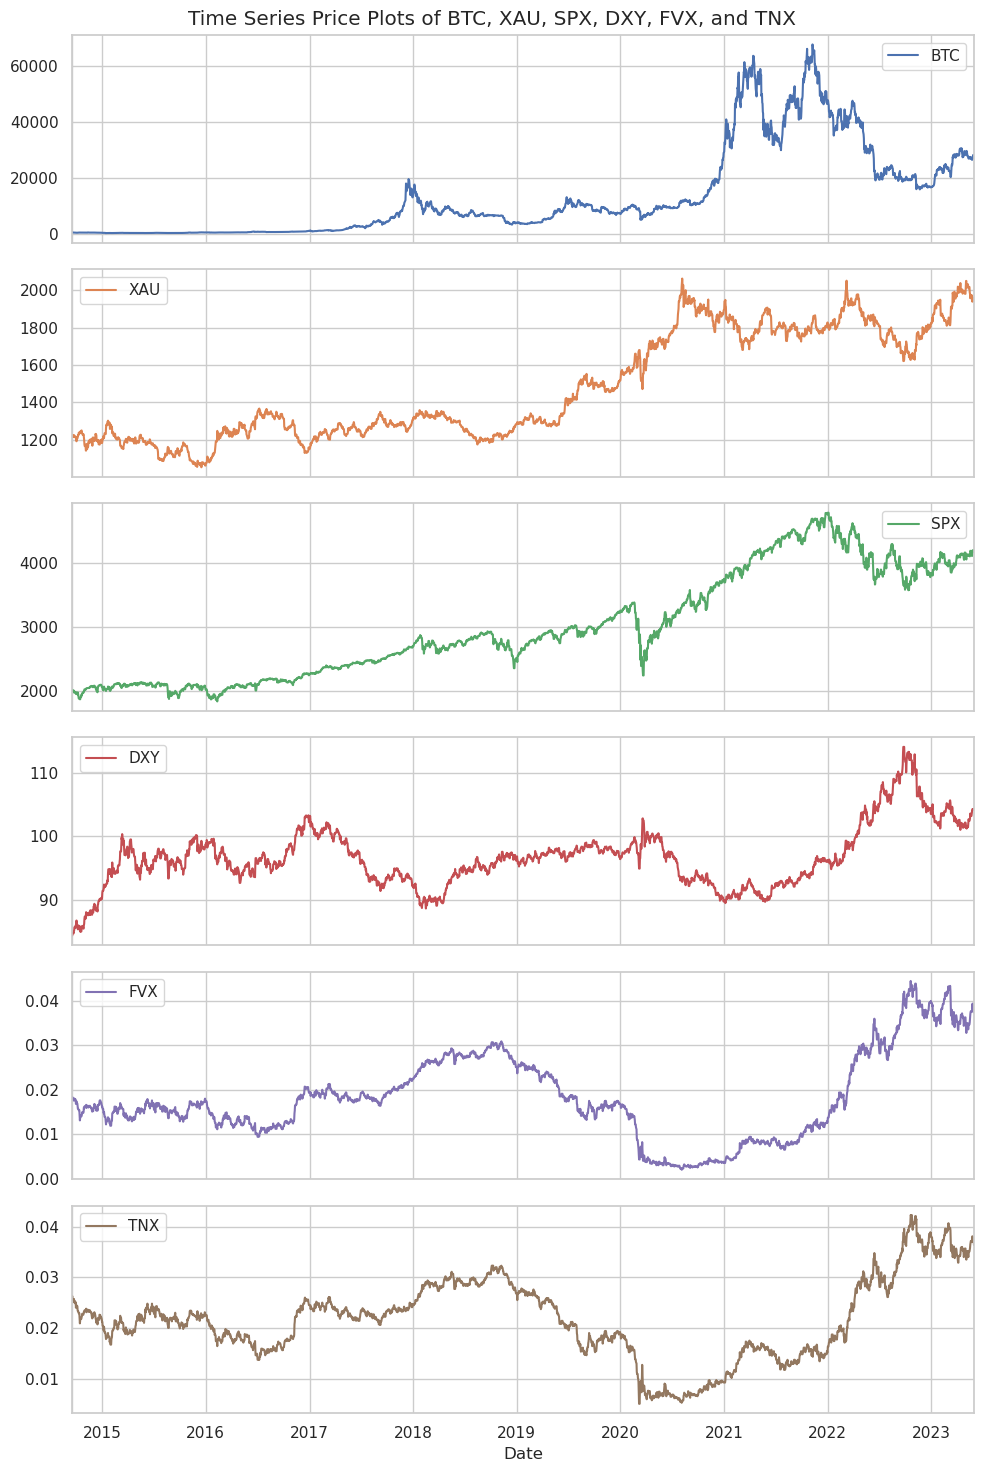

In [4]:
# Time Series Plots
df.plot(subplots=True, layout=(6, 1), figsize=(10, 15), 
        title='Time Series Price Plots of BTC, XAU, SPX, DXY, FVX, and TNX')

# Adjust the layout spacing
plt.tight_layout()

# Show the plots
plt.show()

The time series plots give us a visual representation of how each variable has changed over time. We can see trends, patterns, and anomalies that may not be apparent from the raw data.

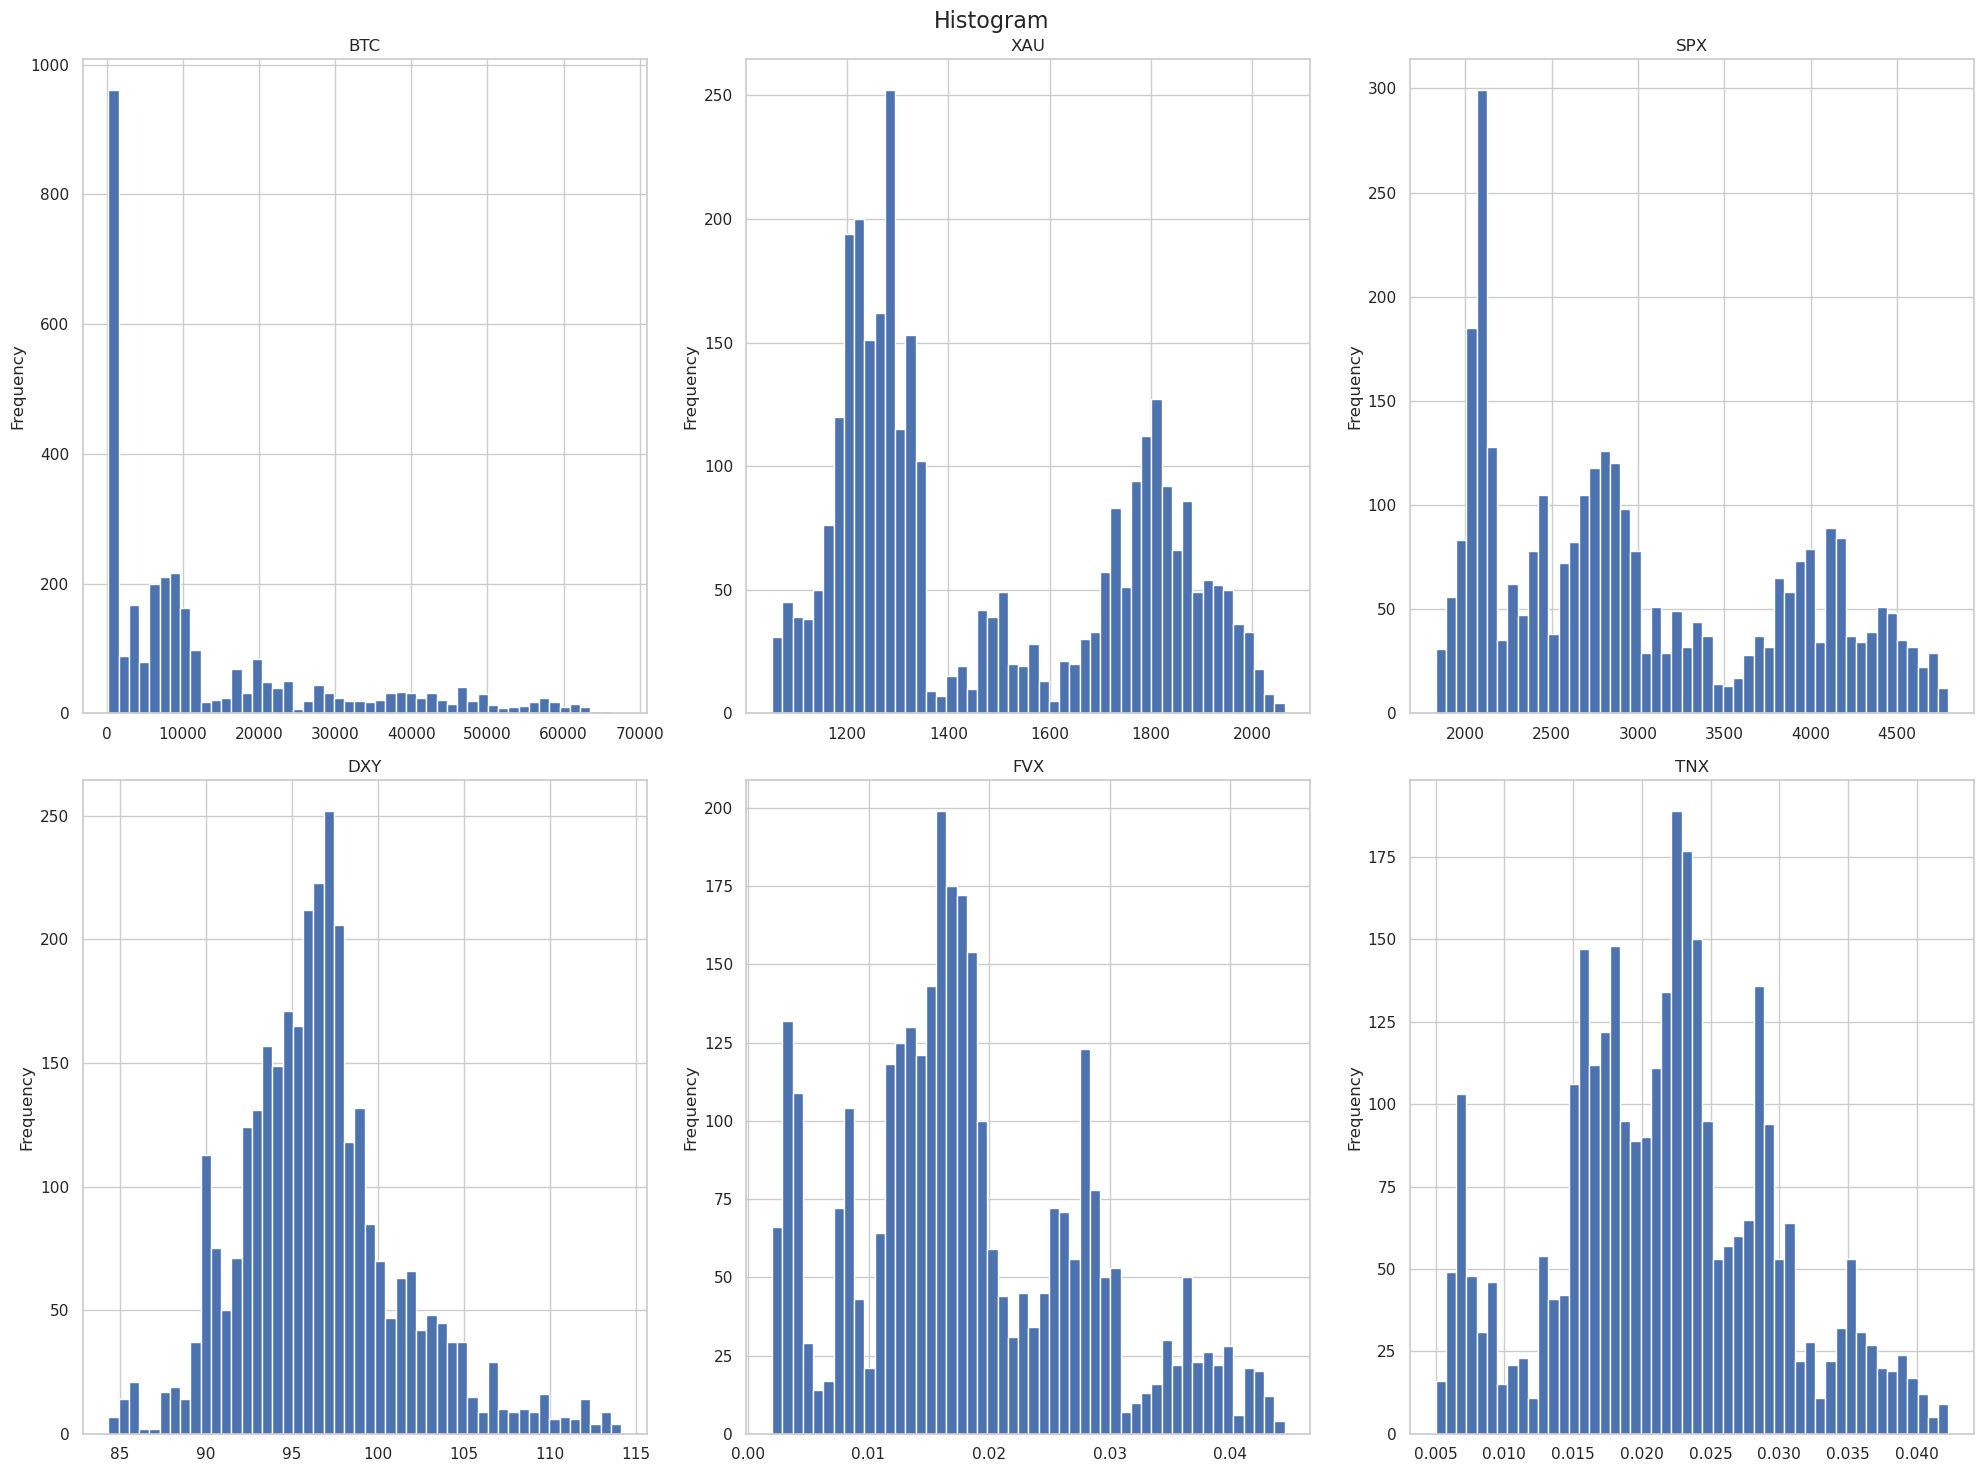

In [5]:
# Histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
fig.suptitle('Histogram', fontsize=16)

# Plot histograms for each column
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    df[col].plot.hist(ax=ax, bins=50)
    ax.set_title(col)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Histograms

The histograms provide a visual representation of the distribution of each financial instrument. Each histogram plot uses the range of values of the respective instrument as its x-axis and the frequency of these values as its y-axis. Each bar in the histogram corresponds to a range of values (also known as a bin), and the height of the bar represents the count of data points within that range.

These histograms help us visualize the shape of the distribution, the central tendency (where most of the values cluster), and the spread of the data (variability). Additionally, the shape of each histogram can give us insights into the skewness of the data distribution. For example, a distribution with a longer right tail is known as right-skewed. This visual analysis can be useful in understanding the overall behavior of each financial instrument.

# Data Segmentation

Data segmentation involves dividing the data into segments based on certain criteria. In this case, we'll segment the data by year to see how the variables have changed over time.

In [6]:
# Data Segmentation
df['Year'] = df.index.year
df.groupby('Year').mean()

,BTC,XAU,SPX,DXY,FVX,TNX
Year,,,,,,
2014,363.693774,1202.493774,2008.350472,87.211415,0.016191,0.023058
2015,272.453726,1160.118712,2060.988932,96.290575,0.015265,0.021333
2016,568.492650,1248.081448,2093.960929,96.905164,0.013368,0.018396
2017,4006.033644,1258.611205,2449.393671,96.589151,0.019070,0.023278
2018,7572.298877,1269.216685,2742.810000,93.582712,0.027462,0.029098
2019,7395.246658,1393.336219,2913.083589,97.391068,0.019541,0.021401
2020,11116.377896,1771.868060,3218.454235,95.817842,0.005345,0.008865
2021,47436.932466,1799.237589,4270.457151,92.492575,0.008545,0.014379
2022,28197.754110,1801.327096,4097.624356,104.006959,0.030103,0.029594


The table shows the average values of each variable for each year. This allows us to see how the variables have changed over time on an annual basis.

# Correlation Analysis

We'll perform a correlation analysis to measure the strength and direction of the relationship between BTC and the other variables. We'll calculate the Pearson correlation coefficient, the beta score, and perform a linear regression and multiple linear regression analysis.

In [7]:
def add_value_labels_and_rotate_labels(ax):
    bars = ax.containers[0]
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # The text inside the bar
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the text
                    xytext=(0, 3),  # Offset of the text from the bar top
                    textcoords="offset points",
                    ha='center')
    
    # Rotate and align the x-axis labels
    ax.set_xticks(np.arange(len(ax.get_xticks())))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

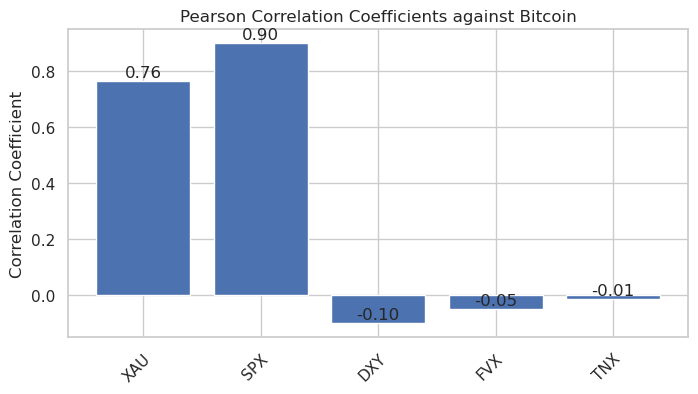

In [8]:
# Calculate Pearson Correlation Coefficient
pearson_btc_xau = stats.pearsonr(df['BTC'], df['XAU'])
pearson_btc_spx = stats.pearsonr(df['BTC'], df['SPX'])
pearson_btc_dxy = stats.pearsonr(df['BTC'], df['DXY'])
pearson_btc_fvx = stats.pearsonr(df['BTC'], df['FVX'])
pearson_btc_tnx = stats.pearsonr(df['BTC'], df['TNX'])

# Pearson Correlation Coefficient
pearson_correlations = [pearson_btc_xau[0], pearson_btc_spx[0], pearson_btc_tnx[0], pearson_btc_fvx[0], pearson_btc_dxy[0]]
pearson_labels = ['XAU', 'SPX', 'DXY', 'FVX', 'TNX']

# Set up the figure for Pearson Correlation Coefficient
fig, ax = plt.subplots(figsize=(8, 4))

# Plot Pearson Correlation Coefficient
bars = ax.bar(pearson_labels, pearson_correlations)
ax.set_title('Pearson Correlation Coefficients against Bitcoin')
ax.set_ylabel('Correlation Coefficient')

# Call the function for adding value labels inside the bars and tilting the horizontal labels
add_value_labels_and_rotate_labels(ax)

# Show the plot for Pearson Correlation Coefficient
plt.show()

### Pearson correlation

The Pearson correlation coefficient measures the linear relationship between two datasets. The coefficient ranges from -1 to 1. A value of 1 means a perfect positive correlation, a value of -1 means a perfect negative correlation, and a value of 0 means no correlation.

From the results, we can see that Bitcoin has a strong positive correlation with Gold and S&P 500 Index, and a weak negative correlation with US 5-Year Treasury Yield and US 10-Year Treasury Yield.

## Correlation Coefficient 
## (r) = (Σ((X - μX) * (Y - μY))) / (n * σX * σY)

Where:

* Σ represents the sum of the products of the differences between each corresponding pair of X and Y values and their respective means.
* X and Y are the variables being compared.
* μX and μY are the means (average) of X and Y, respectively.
* n is the number of data points (observations).
* σX and σY are the standard deviations of X and Y, respectively.

The formula can be broken down into the following steps:

1. Calculate the mean (μ) for both X and Y.
2. Calculate the differences between each X value and the mean of X, and the differences between each Y value and the mean of Y.
3. Multiply the differences for each corresponding pair of X and Y values.
4. Sum up the products of the differences.
5. Divide the sum by the product of the standard deviations of X and Y, multiplied by the number of data points.

In [9]:
# Calculate the beta score
beta_btc_spx = df['BTC'].cov(df['SPX']) / df['SPX'].var()

# Print the beta score as text
print(f'Beta Score: {beta_btc_spx:.2f}')

Beta Score: 17.29


### Beta Score

The beta score measures the volatility, or systematic risk, of an investment in comparison to the market as a whole. It is used in the capital asset pricing model (CAPM), which calculates the expected return of an asset based on its beta and expected market returns.

For Bitcoin (BTC) compared to the S&P 500 Index (SPX), the beta score is 17.29.

A beta score above 1 indicates that Bitcoin tends to be more volatile than the overall market. In this case, a beta score of 17.29 implies that Bitcoin's price movements are expected to be significantly more volatile compared to the S&P 500 Index.

It's important to note that the beta score is just one metric for assessing an asset's risk and relationship with the market. Other factors and analysis should be considered when making investment decisions.

The beta score is calculated using the following formula:

#### Beta Score = Covariance(Return of Asset, Return of Market) / Variance(Return of Market)

How to get Covariance and Variance

##### Calculate the covariance:

* Subtract the average return of the asset from each individual asset return and subtract the average return of the market from each individual market return.
* Multiply the differences obtained in the previous step for each pair of corresponding asset and market returns.
* Sum up all the products obtained in the previous step.
* Divide the sum by the total number of returns minus 1.

##### Calculate the variance of the market returns:

* Subtract the average return of the market from each individual market return.
* Square each difference obtained in the previous step.
* Sum up all the squared differences.
* Divide the sum by the total number of market returns minus 1.

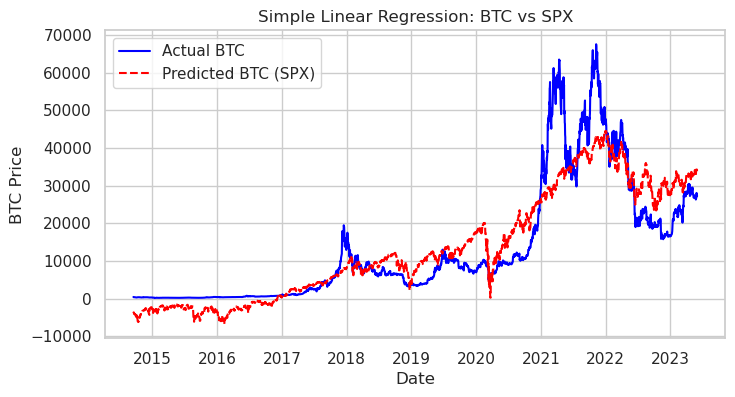

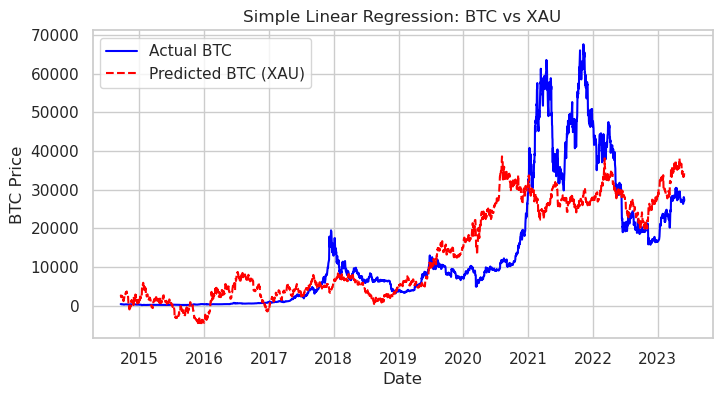

In [10]:
# Simple Linear Regression for SPX
model_spx = LinearRegression().fit(df[['SPX']], df['BTC'])
y_predicted_spx = model_spx.predict(df[['SPX']])

# Set up the figure for Simple Linear Regression for SPX
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.index, df['BTC'], color='blue', label='Actual BTC')
ax.plot(df.index, y_predicted_spx, color='red', linestyle='--', label='Predicted BTC (SPX)')
ax.set_title('Simple Linear Regression: BTC vs SPX')
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price')
ax.legend()
plt.show()

# Simple Linear Regression for XAU
model_xau = LinearRegression().fit(df[['XAU']], df['BTC'])
y_predicted_xau = model_xau.predict(df[['XAU']])

# Set up the figure for Simple Linear Regression for XAU
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.index, df['BTC'], color='blue', label='Actual BTC')
ax.plot(df.index, y_predicted_xau, color='red', linestyle='--', label='Predicted BTC (XAU)')
ax.set_title('Simple Linear Regression: BTC vs XAU')
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price')
ax.legend()
plt.show()

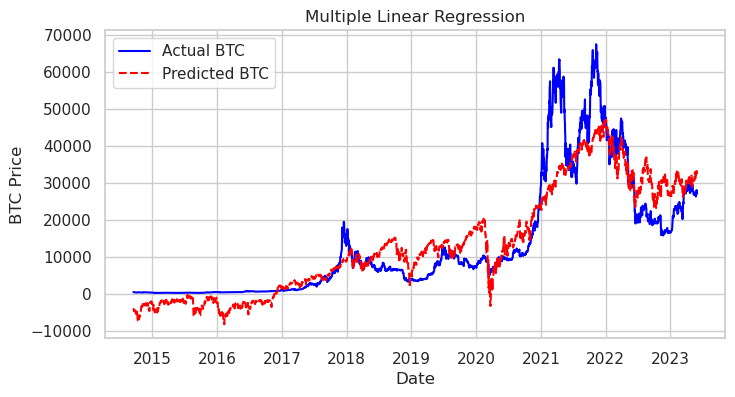

In [11]:
# Prepare the data
X = df[['XAU', 'SPX']]
y = df['BTC']

# Fit the multiple linear regression model
model = LinearRegression().fit(X, y)

# Get the predicted values
y_predicted = model.predict(X)

# Set up the figure for Multiple Linear Regression
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the actual and predicted values
ax.plot(df.index, y, color='blue', label='Actual BTC')
ax.plot(df.index, y_predicted, color='red', linestyle='--', label='Predicted BTC')

ax.set_title('Multiple Linear Regression')
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price')
ax.legend()

# Show the plot for Multiple Linear Regression
plt.show()

### Linear Regression Analysis

Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship, allowing us to predict the dependent variable based on the independent variables.

In our analysis with BTC/SPX and BTC/XAU, we performed simple linear regression to understand the relationship between BTC (Bitcoin) and SPX (S&P 500 Index) as well as between BTC and XAU (Gold). This helped us assess the linear association between BTC and each financial instrument.

To expand our analysis, we explored multiple linear regression. By considering both XAU and SPX as independent variables, we simultaneously predicted BTC using these variables. This allowed us to examine how BTC price is influenced by the combined effects of XAU and SPX.

The coefficients obtained from the regression models represent the strength and direction of the relationship between the independent variables and BTC. We used these coefficients to create a predictive model that estimates BTC price based on the values of XAU and SPX.

To visualize the regression results, we plotted the actual BTC prices alongside the predicted BTC prices derived from the linear regression models. This visual representation helped us assess the accuracy of the models and gain insights into the relationships between BTC, XAU, and SPX.

It's important to note that linear regression assumes linearity between variables and specific assumptions about the data. Evaluating these assumptions and interpreting the results is crucial for drawing reliable conclusions from the analysis.

By focusing on SPX and XAU, we selected financial instruments that are positively correlated with BTC. This choice allowed us to capture the influences of the broader stock market (SPX) and the precious metal market (XAU) on BTC price movements. Additionally, it helped us keep the analysis focused and manageable while providing meaningful insights into the relationships between BTC and these key instruments.

Through the application of simple and multiple linear regression techniques, we gained insights into the associations between BTC and individual financial instruments (BTC/SPX, BTC/XAU) as well as the combined effects of multiple variables (BTC/SPX,XAU) on BTC price.

# Conclusion

In this analysis, we explored the relationship between Bitcoin and several financial indicators, including Gold, S&P 500 Index, US Dollar Index, US 5-Year Treasury Yield, and US 10-Year Treasury Yield. We found that Bitcoin has a strong positive correlation with Gold and S&P 500 Index, indicating that as Gold and the S&P 500 Index increase, Bitcoin prices tend to rise as well. On the other hand, Bitcoin has a weak negative correlation with US 10-Year Treasury Yield and US 5-Year Treasury Yield, suggesting that as yields on these Treasury securities rise, Bitcoin prices may experience a slight decrease.

To assess the volatility and systematic risk of Bitcoin, we calculated the beta score. The beta score compares the price movements of Bitcoin to that of a benchmark, which in our case was the S&P 500 Index. The beta score of Bitcoin against the S&P 500 Index was 17.29, indicating that Bitcoin is significantly more volatile than the broader stock market.

We conducted linear regression and multiple linear regression analyses to better understand the relationships between Bitcoin and these financial indicators. The linear regression analysis revealed the slope of the relationship between Bitcoin and each indicator individually, while the multiple linear regression analysis considered multiple variables simultaneously to predict Bitcoin prices.

These findings provide valuable insights for investors and traders. The positive correlation between Bitcoin and Gold, as well as the S&P 500 Index, suggests that Bitcoin may serve as a potential hedge against market volatility and a store of value during uncertain economic times. However, it's important to note that correlation does not imply causation, and other factors may also influence Bitcoin prices. Therefore, it's essential to conduct further research and analysis before making investment decisions.

It's worth mentioning that the financial markets are complex and unpredictable, and past performance is not indicative of future results. Therefore, a comprehensive understanding of the underlying factors and thorough risk assessment is necessary when considering investments in Bitcoin or any financial instrument.

Overall, this analysis provides a foundation for understanding the relationships between Bitcoin and these financial indicators, offering insights that can inform investment strategies and decision-making.

In [12]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Save the correlation matrix to a CSV file
corr_matrix.to_csv('corr_matrix.csv')